In [1]:
#Description:
#Chart Pattern Image Recognition - Identify chart patterns by Convolutional Neural Networks 
#Model Type: Convolutional Neural Network
#06-10-2022
#Version - V1.0 Beta


#------------------------------
#Version Updates:
#Importing pickle data
#Add layers 
#Fit the model 
#Test the model using your own Images

#------------------------------
#Future implementations 
#Add more data to the dataset
#Add Automated Download dataset from google images 
#Add more CATEGORIES such as Flags, Pennant, Cup and handle and so on. 
#Add Auto Test Image from any Chart  

### Author - Luiz Gabriel Bongiolo

### References 
# Harrison Kinsley @Sentdex - Deep Learning with Python, TensorFlow, and Keras tutorial - https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
# Shaan Shah - Identifying Candlestick Patterns using Deep Learning - https://towardsdatascience.com/identifying-candlestick-patterns-using-deep-learning-b7d706726874
# https://www.tensorflow.org/api_docs/python/tf/all_symbols
# https://keras.io/api/layers/




In [2]:
import cv2
import tensorflow as tf
from IPython.display import Image

# Remove warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")



2022-10-15 22:27:16.854893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/semrival/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-15 22:27:16.854919: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#Test Images Folder

folder = ("/home/Documents/Python Programs/Chart Pattern Image Recognition/Test Images/")

In [4]:
CATEGORIES = ["Bearish", "Bullish"]

In [5]:
def prepare(filepath):
    IMG_SIZE = 100                                            # Must be the same size used on the model 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

2022-10-15 22:27:19.472193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 22:27:19.479284: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/semrival/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-15 22:27:19.479372: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/semrival/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-15 22:27:19.479442: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: l

1/1 [==============================] - 0s 156ms/step
[[0.]]
Bearish


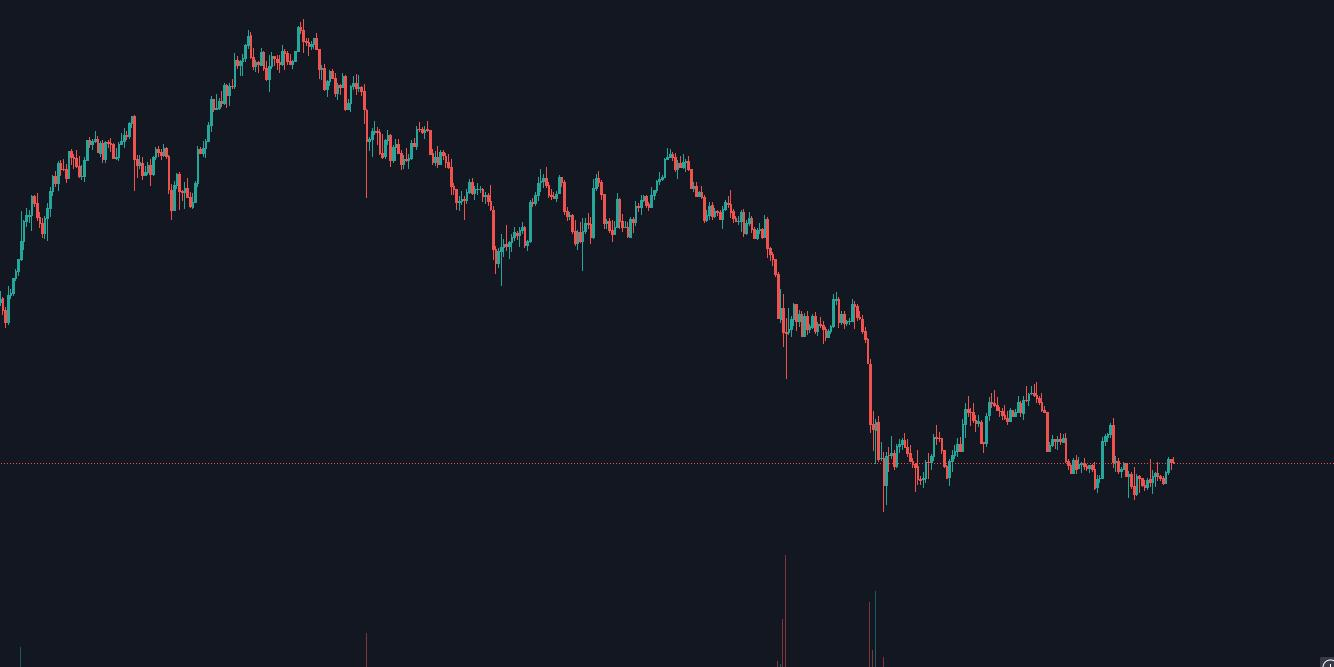

In [6]:

model = tf.keras.models.load_model("/home/Documents/Python Programs/Chart Pattern Image Recognition/Chart-Recognition-64x3-CNN.model")


image = folder + ("chart1.jpg")

prediction = model.predict([prepare(image)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

Image(filename=image) 